
🚀 訓練模型：1 隱藏層, 32 個神經元

🚀 訓練模型：1 隱藏層, 64 個神經元

🚀 訓練模型：1 隱藏層, 128 個神經元

🚀 訓練模型：2 隱藏層, 32 個神經元

🚀 訓練模型：2 隱藏層, 64 個神經元

🚀 訓練模型：2 隱藏層, 128 個神經元

🚀 訓練模型：3 隱藏層, 32 個神經元

🚀 訓練模型：3 隱藏層, 64 個神經元

🚀 訓練模型：3 隱藏層, 128 個神經元


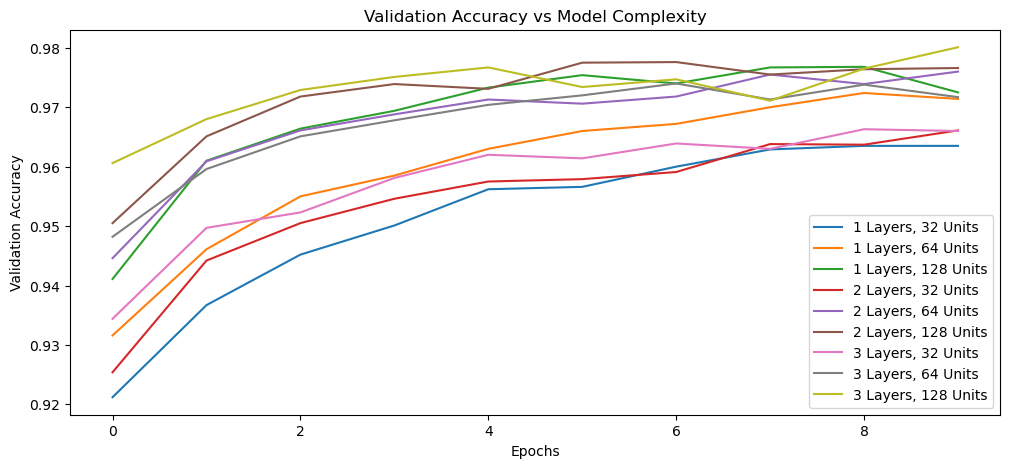

In [1]:
# 匯入必要的函式庫
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# 1️⃣ 載入 MNIST 數據集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2️⃣ 數據預處理
x_train = x_train.reshape(60000, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(10000, 28 * 28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3️⃣ 建立不同深度的淺層神經網路
def build_model(hidden_layers=1, units=64):
    model = Sequential()
    model.add(Input(shape=(784,)))  # 🔹 使用 Input() 定義輸入層
    for _ in range(hidden_layers):  # 根據設定的層數增加隱藏層
        model.add(Dense(units, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 🔹 分類問題的輸出層，使用 Softmax

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])  # 🔹 使用 Accuracy 作為評估指標
    
    return model

# 4️⃣ 設定不同的隱藏層數與神經元數
hidden_layers_list = [1, 2, 3]
units_list = [32, 64, 128]
history_dict = {}

# 5️⃣ 訓練不同深度與節點數的模型
for layers in hidden_layers_list:
    for units in units_list:
        print(f"\n🚀 訓練模型：{layers} 隱藏層, {units} 個神經元")
        model = build_model(hidden_layers=layers, units=units)

        # 訓練模型
        history = model.fit(x_train, y_train, 
                            epochs=10, batch_size=128, 
                            validation_data=(x_test, y_test),
                            verbose=0)
        
        # 儲存歷史記錄
        history_dict[(layers, units)] = history

# 6️⃣ 繪製學習曲線（Validation Accuracy）
plt.figure(figsize=(12, 5))
for layers in hidden_layers_list:
    for units in units_list:
        history = history_dict[(layers, units)]
        plt.plot(history.history['val_accuracy'], label=f'{layers} Layers, {units} Units')

plt.title("Validation Accuracy vs Model Complexity")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()
